In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
user_date = pd.read_csv('../files/user_data.csv')
user_date.head(5)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [411]:
logs = pd.read_csv('../files/logs.csv')
logs.head()


,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [412]:
# Количество уникальных платформ
pd.Series.nunique(logs['platform'])

3

In [413]:
# Клиенты с максимальным числом успешных операций
a = logs[logs['success'] == True].groupby('client', as_index=False).agg({'success': 'count'})
max_success = a[a['success'] == a['success'].max()]['client']
max_success

332     12179
810     28719
1020    36165
1487    52870
1758    61468
1759    61473
2231    78349
2345    82563
2626    92584
Name: client, dtype: int64

In [414]:
popular_platform = logs[logs['success'] == True].groupby('platform', as_index=False).agg({'client': 'count'}).sort_values('client', ascending=False).head(1)

In [415]:
merged_data = user_date.merge(logs)
merged_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [416]:
b = merged_data[['age', 'premium']].groupby(['age', 'premium'], as_index=False).value_counts()
pd.DataFrame(b)

,age,premium,count
0,20,False,46
1,20,True,9
2,21,False,50
3,21,True,8
4,22,False,51
...,...,...,...
95,67,True,11
96,68,False,98
97,68,True,9
98,69,False,83


In [417]:
# Самая популярная платформа среди премиальных клиентов
merged_data.loc[merged_data['premium'] == True]['platform'].value_counts().idxmax()

'phone'

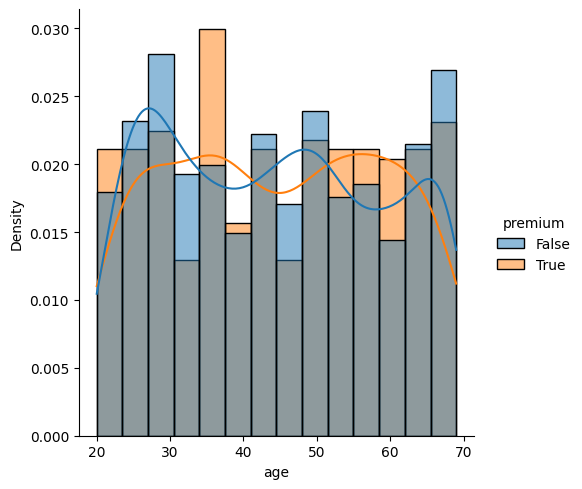

In [418]:
ax = sns.displot(data=merged_data, x='age', hue='premium', stat='density', common_norm=False, kde=True, bins=14)

In [419]:
a = merged_data.loc[merged_data['success']==True]['client'].value_counts()
a = a.rename('successes')

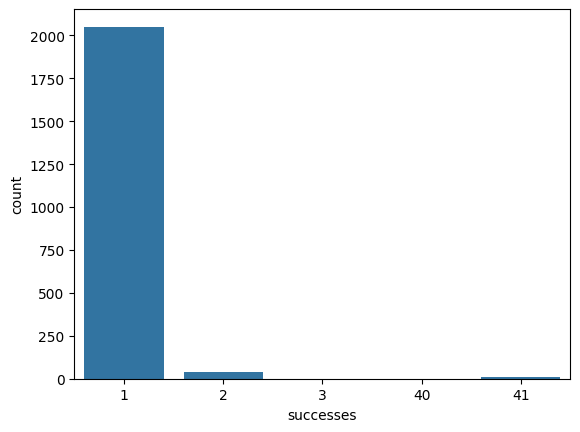

In [420]:
ax = sns.countplot(x=a)

In [421]:
b = merged_data.loc[(merged_data['success']==True) & (merged_data['platform'] == 'computer')][['platform', 'age']].value_counts().reset_index()
b = pd.DataFrame(b)
b

,platform,age,count
0,computer,28,49
1,computer,49,33
2,computer,25,33
3,computer,32,27
4,computer,68,26
5,computer,24,26
6,computer,69,24
7,computer,65,23
8,computer,52,22
9,computer,54,22


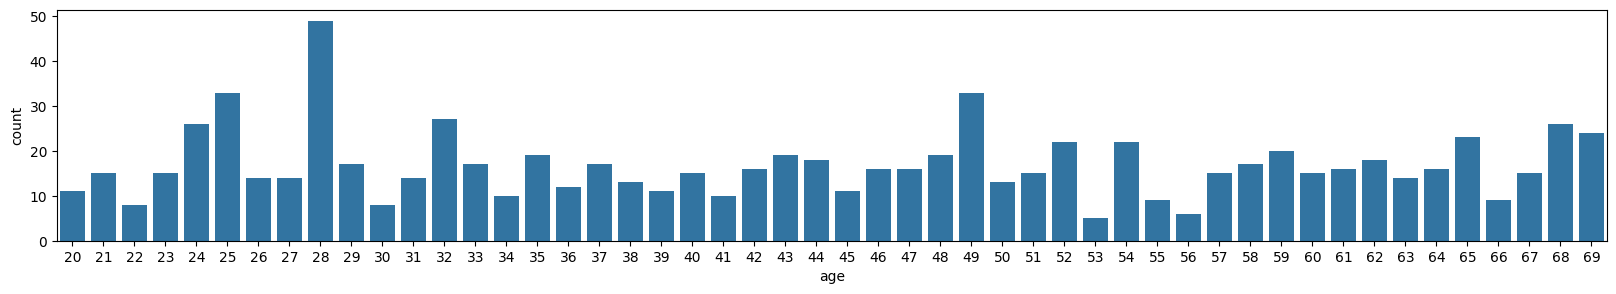

In [428]:
plt.figure(figsize=(20,3))
ax1 = sns.barplot(data=b, x='age', y='count')
